In [30]:
# -*- coding: utf-8 -*-
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or
# implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

# 1. Classification metrics

URL https://scikit-learn.org/stable/modules/model_evaluation.html

In [31]:
y_true = [0, 1, 0, 0, 1, 1, 0, 1, 0, 1]
y_pred = [0, 0, 0, 0, 0, 1, 0, 1, 1, 1]

## 1.1 Accuracy, precission, recall

### $Accuracy = \frac{TP+TN}{TP+FP+FN+TN}$

### $Precision = \frac{TP}{TP+FP}$

### $Recall = \frac{TP}{TP+FN}$

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(accuracy_score(y_true, y_pred))
print(accuracy_score(y_true, y_pred, normalize=False))

print(precision_score(y_true, y_pred, average='macro'))
print(precision_score(y_true, y_pred, average='micro'))
print(precision_score(y_true, y_pred, average='weighted'))
print(precision_score(y_true, y_pred, average=None))

print(recall_score(y_true, y_pred, average='macro'))
print(recall_score(y_true, y_pred, average='micro'))
print(recall_score(y_true, y_pred, average='weighted'))
print(recall_score(y_true, y_pred, average=None))

0.7
7
0.7083333333333333
0.7
0.7083333333333333
[0.66666667 0.75      ]
0.7
0.7
0.7
[0.8 0.6]


## 1.2 F1-score

### $F1 = 2\frac{precission \cdot recall}{precission + recall}$

### $F_β = (1 + β^2)\frac{precission \cdot recall}{β^2 \cdot precission + recall}$

In [33]:
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score

print(f1_score(y_true, y_pred))
print(fbeta_score(y_true, y_pred, beta=0.5))

0.6666666666666665
0.7142857142857143


## 1.3 Confusion matrix

In [34]:
# y_true = [2, 0, 2, 2, 0, 1]
# y_pred = [0, 0, 2, 2, 0, 2]

# y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
# y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)
# confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])

array([[4, 1],
       [2, 3]])

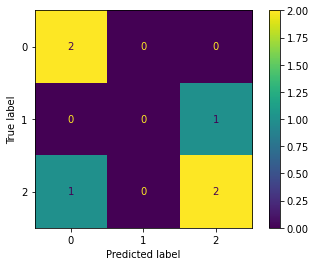

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot()

## 1.4 ROC and AUC

### $TPR = Sensivity = Recall = \frac{TP}{TP+FN}$ 

### $FPR = \frac{FP}{FP+TN}$

alternatively:

### $FPR = 1 - Specificity = 1 - \frac{TN}{TN+FP}$

<img src="https://upload.wikimedia.org/wikipedia/commons/e/ea/Python_roc_curve.png" width="500"/>

In [37]:
import numpy as np
from sklearn.metrics import roc_auc_score

# y_true = np.array([0, 0, 1, 1])
# y_scores = np.array([0.1, 0.4, 0.35, 0.8])
y_scores = y_pred
roc_auc_score(y_true, y_scores)

0.7000000000000002

## 1.5 Log loss, aka logistic loss or cross-entropy loss

### $-log P(\frac{y_t}{y_p}) = -(y_t log(y_p) + (1 - y_t) log(1 - y_p))$

In [38]:
from sklearn.metrics import log_loss

log_loss(["spam", "ham", "ham", "spam"],
         [[.1, .9], [.9, .1], [.8, .2], [.35, .65]])

0.21616187468057912

# 2. Regression metrics

URL https://scikit-learn.org/stable/modules/model_evaluation.html

## 2.1 Mean Square Error (MSE) and Root Mean Square Error (RMSE)

### $MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \widehat{y_i})^2$

### $RMSE = \sqrt{MSE}$

In [ ]:
from sklearn.metrics import mean_squared_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

print(mean_squared_error(y_true, y_pred))                  # RMSE
print(mean_squared_error(y_true, y_pred, squared=False))   # MSE

y_true = [[0.5, 1],[-1, 1],[7, -6]]
y_pred = [[0, 2],[-1, 2],[8, -5]]

print(mean_squared_error(y_true, y_pred, multioutput='raw_values'))
print(mean_squared_error(y_true, y_pred, squared=False))

## 2.2 Mean Absolute Error (MAE)

### $MAE = \frac{1}{n} \sum_{i=1}^n |y_i - \widehat{y_i}|$

In [ ]:
from sklearn.metrics import mean_absolute_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print(mean_absolute_error(y_true, y_pred))

y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
print(mean_absolute_error(y_true, y_pred))
print(mean_absolute_error(y_true, y_pred, multioutput='raw_values'))
print(mean_absolute_error(y_true, y_pred, multioutput=[0.3, 0.7]))

## 2.3 $R^2$ or R-squared  ot Coefficient of determination

### $R^2 = 1 - \frac{\frac{1}{n} \sum_{i=1}^n (y_i - \widehat{y_i})^2}{\frac{1}{n} \sum_{i=1}^n (y_i - \bar{y_i})^2}$ 


In [ ]:
from sklearn.metrics import r2_score

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

print(r2_score(y_true, y_pred))

## 2.4 Mean Absolute Percentage Error (MAPE) 

### $MAPE ={\frac {100\%}{n}}\sum_{i=1}^{n}\left|{\frac {y_{i} - \widehat{y_i}}{y_{i}}}\right|$

## 2.5 Symmetric Mean Absolute Percentage Error (SMAPE)
### $SMAPE = \frac{100\%}{n} \sum_{i=1}^n \frac{|y_i - \widehat{y_i} | }{ \frac{1}{2} (|y_i| + |\widehat{y_i}|)}$

In [ ]:
# Note: these metrics are not in many libraries because of (their) division by zero. 
# Their use is according to the need and their implementation is quite trivial.

# Your code: 

## 2.6 Micro and Macro-averaging

### Micro-averaging

### $precision = \frac{\sum_{i=1}^{|C|}TP_i}{\sum_{i=1}^{|C|}(TP_i + FP_i)}$ ; $recall = \frac{\sum_{i=1}^{|C|}TP_i}{\sum_{i=1}^{|C|}(TP_i + FN_i)}$

### Macro-averaging

### $precision = \frac{\sum_{i=1}^{|C|}precission_{C_i}}{|C|}$ ; $recall = \frac{\sum_{i=1}^{|C|}recall_{C_i}}{|C|}$

Where $|C|$ is number of classes

### Weighted-averaging

<img src="img/weighted.png" />

In [ ]:
from sklearn.metrics import classification_report

y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']

print(classification_report(y_true, y_pred, target_names=target_names))

In [ ]:
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

y_pred = [1, 1, 0]
y_true = [1, 1, 1]
print(classification_report(y_true, y_pred, labels=[1, 2, 3]))

# 3. Similarity metrics

- Cosine similarity
- Euclidean distance
- Manhattan distance
- Levenshtein distance

## 3.1 Cosine similarity

### $cosine = \frac{y \cdot \widehat{y}}{\|y \|  \cdot  \|\widehat{y} \|} = \frac{\sum_{i=1}^{n}{y_i  \widehat{y_i} } }  
				 { {\sqrt {\sum_{i=1}^{n}{y_i^{2} } } }  {\sqrt {\sum_{i=1}^{n}{\widehat{y_i}^{2} } } } }$

URL https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html

and many other implementations

In [ ]:
from scipy import spatial

a = [3, 45, 7, 2]
b = [2, 54, 13, 15]

cos_sim = 1 - spatial.distance.cosine(a, b)
print(cos_sim)

In [ ]:
from numpy import dot
from numpy.linalg import norm

cos_sim = dot(a, b)/(norm(a)*norm(b))
print(cos_sim)

In [ ]:
def dot(A,B): 
    return (sum(a*b for a,b in zip(A,B)))

def cosine_similarity(a, b):
    return dot(a,b) / ( (dot(a,a) **.5) * (dot(b,b) ** .5) )

cosine_similarity(a, b)

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

a1 = np.array(a).reshape(1, -1)
b1 = np.array(b).reshape(1, -1)
print(a1)
print(b1)

cos_sim = cosine_similarity(a1, b1)
print(cos_sim)

## 3.2 Euclidean distance

### $d(p,q) = d(q,p) = \sqrt{(q_1-p_1)^2 + (q_2-p_2)^2 + \cdots + (q_n-p_n)^2} = \sqrt{\sum_{i=1}^n(q_i-p_i)^2}$

URL https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

X = [[0, 1], [1, 1]]
print(X)

# distance between rows of X
euclidean_distances(X, X)

# get distance to origin
euclidean_distances(X, [[0, 0]])

## 3.3 Manhattan distance (or taxicab distance $d_1$)

### $d_1(p, q)= \|p-q\|_1 = \sum_{i=1}^n|p_i-q_i|$

where $p, q$ are vectors; $p=(p_1, p_2,\dots, p_n)$, $q=(q_1, q_2,\dots, q_n)$

URL https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.manhattan_distances.html

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import manhattan_distances

manhattan_distances([[3]], [[3]])

manhattan_distances([[3]], [[2]])

manhattan_distances([[2]], [[3]])

manhattan_distances([[1, 2], [3, 4]],         [[1, 2], [0, 3]])

X = np.ones((1, 2))
y = np.full((2, 2), 2.)
manhattan_distances(X, y, sum_over_features=False)

## 3.4 Levenshtein distance
Levenshtein distance between two strings $a,b$ is 

$
    \label{eq:lev}
    lev_{a,b}(i,j)=
      \begin{cases}
      \max(i,j) & \text{if $\min(i,j)=0$,} \\[1ex]
      \begin{aligned}[b]
      \min\bigl(lev_{a,b}&(i-1,j)+1, \\
                lev_{a,b}&(i,j-1)+1, \\
                lev_{a,b}&(i-1,j-1)+1_{(a_i\ne b_j)}
          \bigr)
      \end{aligned} & \text{otherwise.}
    \end{cases}
$

where
    $i$ is the terminal character position of $a$,
    $j$ is the terminal character position of $b$, 
    and positions are 1-indexed.
    
<!-- <img src="img/levenshtein.png" /> //-->

URL https://stackabuse.com/levenshtein-distance-and-text-similarity-in-python/

URL https://medium.com/@ethannam/understanding-the-levenshtein-distance-equation-for-beginners-c4285a5604f0

In [ ]:
# Your code: